# Analyzing I-94 Traffic
In this project, I will be analyzing patterns in traffic with the Metro_Interstate_Traffic_Volume.csv and creating graphs to visualize the data using matplotlib and seaborn. By the end of the project, we will have a more clear idea of how weather affects traffic for I-94 westbound between Saint-Paul and Minneapolis.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
import matplotlib.pyplot as plt
%matplotlib inline
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

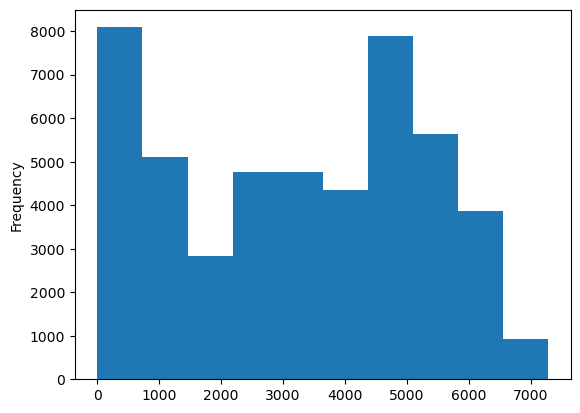

In [4]:
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

### Daytime Vs. Nighttime Traffic
From the data, it seems as though there are two high points. This may be due to one high point being the traffic of I-94 at night, while the other one may be regular day traffic. We will see if that is actually the case.

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
daytime_traffic = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
nighttime_traffic = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

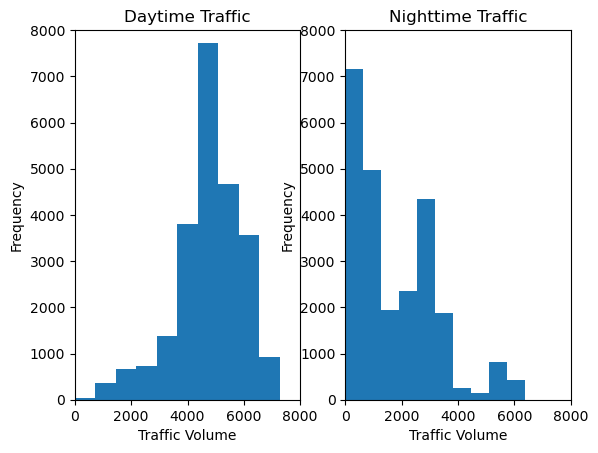

In [6]:
plt.figure()
plt.subplot(1, 2, 1)
daytime_traffic['traffic_volume'].plot.hist()
plt.title('Daytime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0, 8000])
plt.xlim([0, 8000])

plt.subplot(1, 2, 2)
nighttime_traffic['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0, 8000])
plt.xlim([0, 8000])
plt.show()

In [7]:
daytime_traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [8]:
nighttime_traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


After comparing the two histograms, it appears that daytime has significantly higher traffic than nighttime. The daytime traffic's historgram appears to be a normal distribution, while nighttime's historam is right-skewed. For nighttime, 75% of the traffic volume falls under 2819, while the mean of daytime traffic is 4762. Because the purpose of this study is to identify the causes of heavy traffic on I-94, going forward we will only be analyzing the data for the **daytime_traffic** slice.

### Time and Traffic
Next, we will examine how the following time factors impact Traffic on I-94 during the daytime:
- Month
- Day of the Week
- Time of Day

#### Traffic by Month

C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\1003187869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\1003187869.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = daytime_traffic.groupby('month').mean()['traffic_volume'].plot.line()


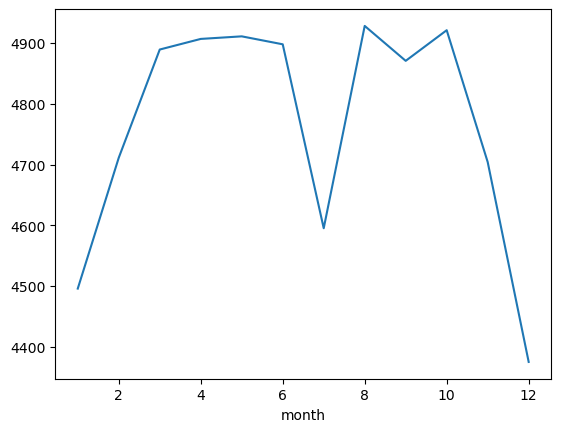

In [9]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean()['traffic_volume'].plot.line()
plt.show()

Looking at the line chart, it appears as though the colder months are lower in traffic (November-Feburary). July's traffic is also lower than the rest of the warmer months. Let's check to see if this is due to a particular year where there may have been road construction in July:

C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\2989229074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['year'] = daytime_traffic['date_time'].dt.year
C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\2989229074.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  only_july.groupby('year').mean()['traffic_volume'].plot.line()


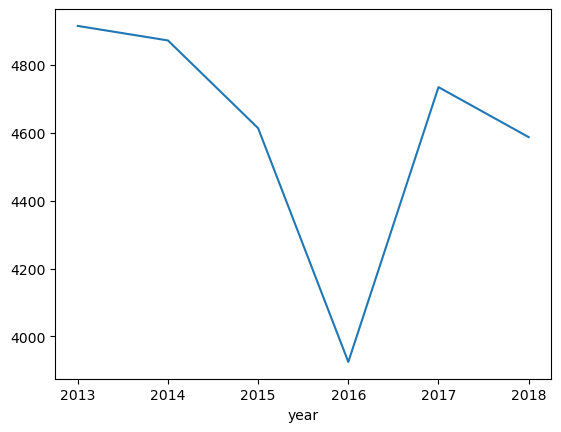

In [10]:
daytime_traffic['year'] = daytime_traffic['date_time'].dt.year
only_july = daytime_traffic[daytime_traffic['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

It appears as though 2016 had a year of very little traffic, indicating that there was road construction on I-94 westbound during this time. Other than this month of 2016, it appears that the warmer months have on average a higher traffic volume than the colder months.

#### Traffic by Day of the Week

C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\2775331918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\2775331918.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = daytime_traffic.groupby('dayofweek').mean()['traffic_volume'].plot.line() # 0 is Monday, 6 is Sunday


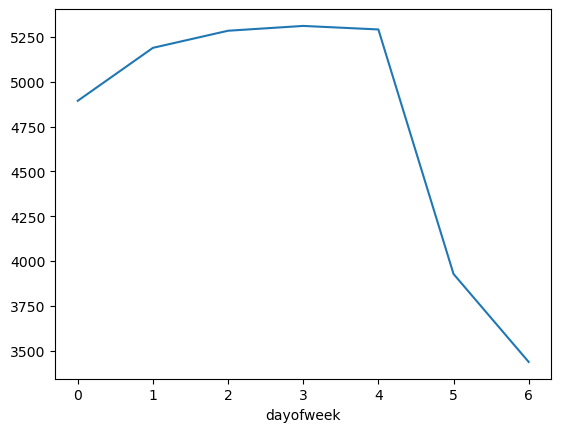

In [11]:
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()['traffic_volume'].plot.line() # 0 is Monday, 6 is Sunday
plt.show()

It appears that traffic on the weekends is significantly lighter on average than traffic on weekdays. Sunday has the lightest traffic of any day. Monday has slightly lighter traffic than the other weekdays.

#### Traffic by Time of Day (Seperating Weekends and Weekdays)

C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\534103862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\534103862.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bussiness_days.groupby('hour').mean()['traffic_volume'].plot.line(label='Weekdays')
C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\534103862.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will d

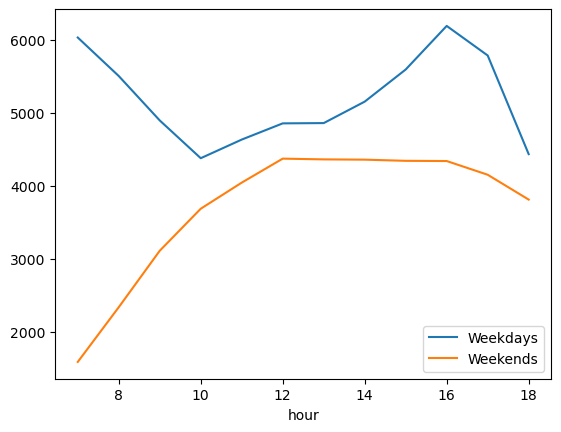

In [12]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
plt.figure()
bussiness_days.groupby('hour').mean()['traffic_volume'].plot.line(label='Weekdays')
weekend.groupby('hour').mean()['traffic_volume'].plot.line(label='Weekends')
plt.legend()
plt.show()

It appears that the busiest hours of traffic for weekdays are 7am (going to work) and 4-5pm (rush-hour back from work).
On the weekends, the mornings have very light traffic until 10am.

### Weather and Traffic
From our data so far, we have determined that the buisiest traffic occurs
- During the buisness days, especially during rush hour at 7am and 4-5pm
- During summer months

Next, we will determine how weather impacts traffic volume.

In [13]:
daytime_traffic.corr()

C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\541268252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  daytime_traffic.corr()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317,0.222072,0.132855,0.000188,0.162691
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697,0.001176,0.001290,-0.009683,0.008279
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265,0.026768,-0.004546,-0.008814,0.003923
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932,0.000595,-0.030387,-0.041980,0.023685
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000,-0.022337,-0.003557,-0.416453,0.172704
month,0.222072,0.001176,0.026768,0.000595,-0.022337,1.000000,-0.158583,0.013656,0.008145
year,0.132855,0.001290,-0.004546,-0.030387,-0.003557,-0.158583,1.000000,-0.012123,-0.003822
dayofweek,0.000188,-0.009683,-0.008814,-0.041980,-0.416453,0.013656,-0.012123,1.000000,-0.002767
hour,0.162691,0.008279,0.003923,0.023685,0.172704,0.008145,-0.003822,-0.002767,1.000000


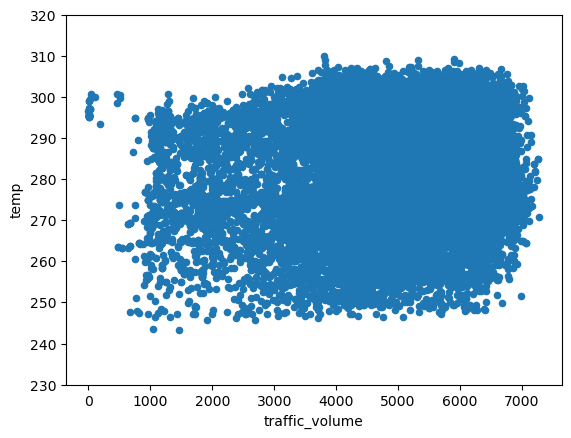

In [14]:
daytime_traffic.plot.scatter(x='traffic_volume', y='temp')
plt.ylim(230, 320)
plt.show()

Although temp has the highest coorelation of any numerical weather data, our scatterplot shows no correlation. We will break down the weather_main column in our data next.

C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\3301018712.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daytime_traffic.groupby('weather_main').mean()['traffic_volume'].plot.barh()


<Axes: ylabel='weather_main'>

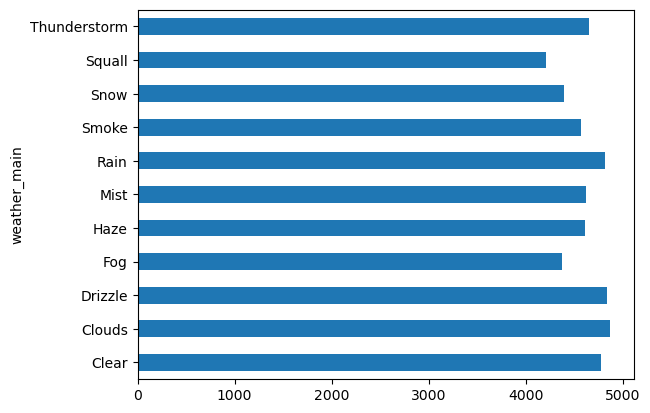

In [15]:
daytime_traffic.groupby('weather_main').mean()['traffic_volume'].plot.barh()

C:\Users\jrhaw\AppData\Local\Temp\ipykernel_7868\4178186820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daytime_traffic.groupby('weather_description').mean()['traffic_volume'].plot.barh(figsize=(5,10))


<Axes: ylabel='weather_description'>

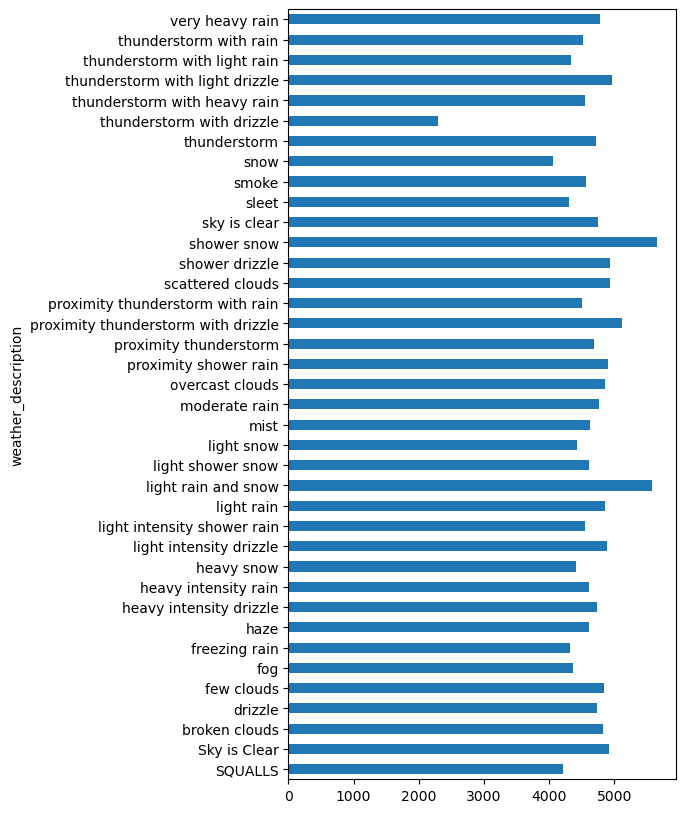

In [19]:
daytime_traffic.groupby('weather_description').mean()['traffic_volume'].plot.barh(figsize=(5,10))

The two clearest heavy-traffic indicators are light rain and snow, as well as shower snow. The weather_main column shows very little correlation to heavy traffic, with clouds having the heaviest traffic and squall having the lowest. It seems unclear how these eather patterns truly impact heavy traffic.

## Conclusion

In this project we have identified the greatest indicators of heavy traffic:
- Weekdays at 7am and 4-5pm
- Warmer months, from March to October
- Specific weather patterns including light rain and snow, and shower snow.